## Using Shapley values from game theory to expain machine learning models

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv('dataset/new_over_data.csv')

In [104]:
# Step 1: Drop nan value
df = df.dropna()
# Step 2: Drop the value that the 'gender == Other'
df = df.loc[df['gender'] != 'Other']
# Step 3: Convert Categories to numbers
df['gender'] = df.iloc[:,1].astype('category').cat.codes
df['ever_married'] = df.iloc[:,5].astype('category').cat.codes
df['work_type'] = df.iloc[:,6].astype('category').cat.codes
df['Residence_type'] = df.iloc[:,7].astype('category').cat.codes
df['smoking_status'] = df.iloc[:,10].astype('category').cat.codes
df = df.drop(columns = ['id'])

df.head(5)

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,282,41.0,0,0,0,0,0,140.93,46.5,206,0
1,1,85,2.0,0,0,0,0,0,107.83,21.2,30,0
2,2,415,26.0,0,0,0,0,0,59.67,24.5,62,0
3,3,223,34.0,0,0,0,0,0,87.21,38.4,175,0
4,4,165,42.0,0,0,0,0,0,72.00,34.4,150,0


In [105]:
# Step 4: Split the Dataset into train set and test set
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Using shap to explain

In [106]:
import shap

In [107]:
from sklearn import tree
model_tree = tree.DecisionTreeClassifier()
model_tree = model_tree.fit(X_train, y_train)

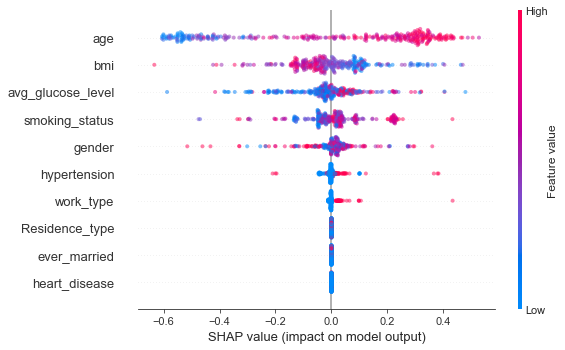

In [111]:
explainer = shap.TreeExplainer(model_tree)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.summary_plot(shap_values[1], X_train, alpha=0.5)

- We can tell the importance of each features in a tree model

In [112]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(X_train, y_train)

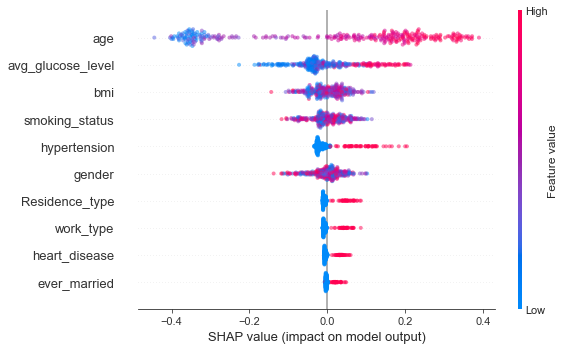

In [113]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.summary_plot(shap_values[1], X_train, alpha=0.5)

- SHAP value is just like feature importance, but this graph can provide more insights by showing how much each feature can affect the target variable (model output) in both negative and positive predictions.
- In this graph, the colors also represent the values of the features, from low to high value -> from blue to red
- In this case, all the numerical features have significant impact on the model output, particularly the age feature, which has the highest impact for predicting stroke.

Text(0.5, 1.0, 'Age dependence plot')

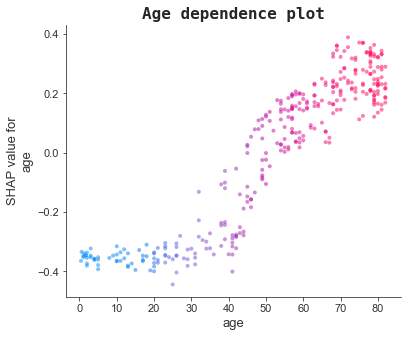

In [114]:
shap.dependence_plot('age', shap_values[1], X_train, interaction_index="age", 
                     alpha=0.5, show=False)
plt.title("Age dependence plot", 
          fontfamily='monospace', fontweight='bold', fontsize=16)

- From the dependence plot, we can see that age has a trend of increasing with SHAP values too.
- This graph also shows that higher age -> more stroke predictions.

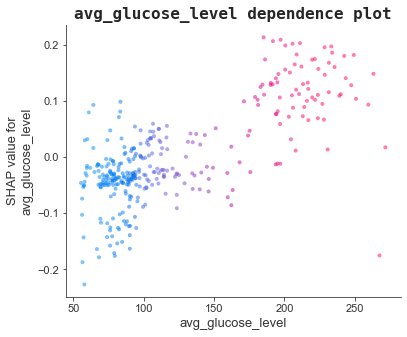

In [115]:
shap.dependence_plot('avg_glucose_level', shap_values[1], X_train, 
                     interaction_index="avg_glucose_level", alpha=0.5, show=False)
plt.title("avg_glucose_level dependence plot", 
          fontfamily='monospace', fontweight='bold', fontsize=16)
plt.show()

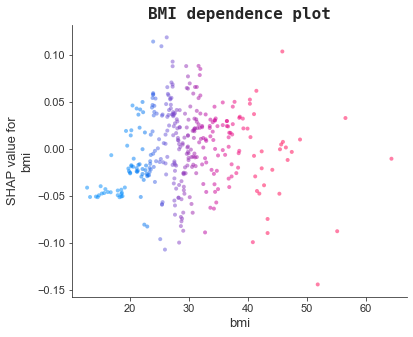

In [116]:
shap.dependence_plot('bmi', shap_values[1], X_train, 
                     interaction_index="bmi", alpha=0.5, show=False)
plt.title("BMI dependence plot", 
          fontfamily='monospace', fontweight='bold', fontsize=16)
plt.show()

A dependence plot is a scatter plot that shows the effect a single feature has on the predictions made by the model. In this example the log-odds of making over 50k increases significantly between age 20 and 40.

- Each dot is a single prediction (row) from the dataset.
- The x-axis is the value of the feature (from the X matrix).
- The y-axis is the SHAP value for that feature, which represents how much knowing that feature's value changes the output of the model for that sample's prediction. For this model the units are log-odds of making over 50k annually.